In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
worldbank_data = pd.read_csv("http://search.worldbank.org/api/projects/all.csv")
worldbank_data.shape

(19016, 57)

In [2]:
#Dropping columns having all Nan Values
drop_columns = [col for col in worldbank_data if worldbank_data[col].isnull().sum()==len(worldbank_data)]
remove_columns=['url', 'location','GeoLocID', 'GeoLocName', 'Latitude', 'Longitude',
                 'Country','productlinetype','projectstatusdisplay','project_name','borrower',
                 'impagency','financier','sector2', 'sector3', 'sector4', 'sector5',
                'theme2', 'theme3', 'theme4', 'theme5']
wb_data = worldbank_data.drop(columns=drop_columns+remove_columns)
#Splitting countryname as it is repeating twice
wb_data['countryname'] = wb_data['countryname'].str.split(';')
wb_data['countryname'] = wb_data['countryname'].str[0]
#Changing Columns containing numeric to Numerical columns and Date columns accordingly
numeric_columns = ['lendprojectcost','ibrdcommamt','ibrdcommamt','idacommamt','totalamt','grantamt']
wb_data[numeric_columns]=wb_data[numeric_columns].replace(',','',regex=True)
wb_data[numeric_columns]=wb_data[numeric_columns].astype('float')
#Converting all the amount to Millions
wb_data[numeric_columns]=wb_data[numeric_columns]/1000000
#Converting date object columns to Date 
wb_data['boardapprovaldate'] = pd.to_datetime(wb_data['boardapprovaldate'],infer_datetime_format=True)
wb_data['closingdate'] = pd.to_datetime(wb_data['closingdate'],infer_datetime_format=True)
wb_data['approval_year']= wb_data['boardapprovaldate'].dt.year
wb_data['closingyear']= wb_data['closingdate'].dt.year

print(worldbank_data.shape)
print(wb_data.shape)

(19016, 57)
(19016, 24)


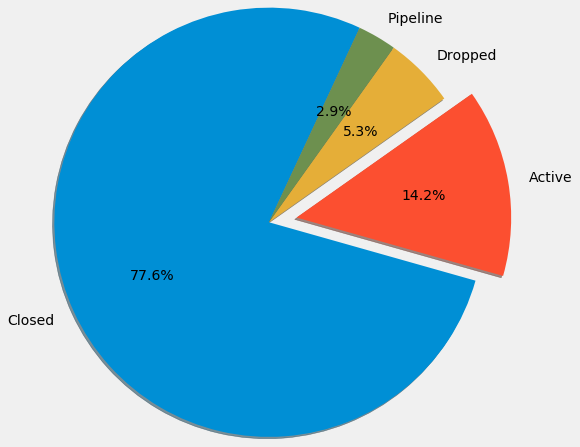

In [3]:
plt.style.use('fivethirtyeight')
#fig = plt.figure(figsize=(12,8),clear=True)
#Drawing pie chart to know the status of various projects
prj_status = wb_data['status'].value_counts(normalize=True).reset_index()
plt.pie('status',labels='index',data=prj_status,autopct='%1.1f%%',radius=2.3,explode=[0,0.3,0,0],shadow=True,startangle=65,);
#plt.text(x=-1.5,y=3.1,s="          Status of various projects of World Bank since 1947",weight='bold',va='top',size=14,ha='center');


In [4]:
#Removing data before 1960 and data about dropped projects
valid_data = wb_data[(wb_data.status!='Dropped')&(wb_data.approval_year>1959)]
valid_data.shape

(17094, 24)

In [5]:
wb_data['status'].value_counts()

Closed      14747
Active       2694
Dropped      1017
Pipeline      556
Name: status, dtype: int64

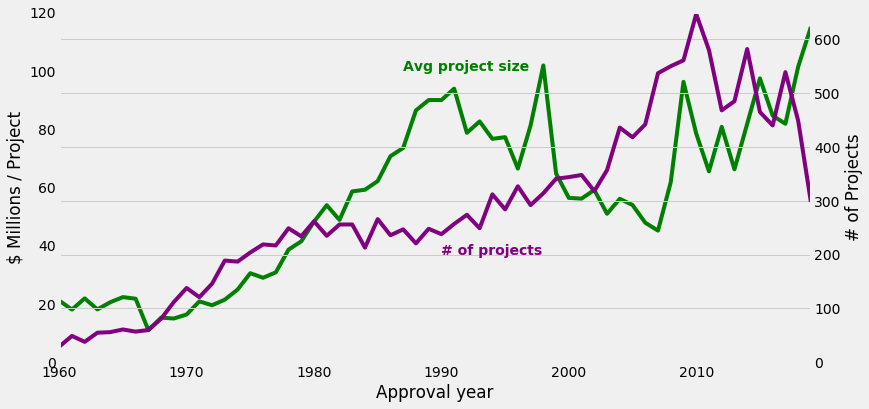

In [6]:
#Average loan given by world bank per year from 1960
fig,ax = plt.subplots(figsize=(12,6),clear=True)
#Drawing a line chart to visualise the data
valid_data.groupby('approval_year')['totalamt'].mean().plot(kind='line',ax=ax,color='green')
ax.set_ylim(0,120,auto=False)
ax1 = ax.twinx()
ax.set_ylabel("$ Millions / Project")
ax.set_xlabel("Approval year")
#Number of approved projects per year
valid_data.groupby('approval_year')['totalamt'].count().plot(kind='line',ax=ax1,color='purple')
ax1.set_ylim(0,650,auto=False)
ax1.set_ylabel('# of Projects')
ax.text(1987,100,"Avg project size",color='green',weight='bold')
ax1.text(1990,200,"# of projects",color='purple',weight='bold');
ax.grid(False)



In [0]:
#Using cut points segregate the data decade wise
cut_points = [1959,1969,1979,1989,1999,2009,2019]
decades = pd.cut(valid_data['approval_year'],cut_points)

In [8]:
#Getting the data for lending amount in each decade regionwise
region_decades = valid_data.pivot_table(index=decades,columns='regionname',values='totalamt',aggfunc='sum',dropna=True).drop(columns=['Other'])
region_decades

regionname,Africa,East Asia and Pacific,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,South Asia
approval_year,,,,,,
"(1959, 1969]",1377.50,1865.30,1172.00,3023.80,689.40,2544.10
"(1969, 1979]",7800.70,10810.80,6575.40,13395.80,5901.60,10492.20
"(1979, 1989]",22655.30,33616.00,14509.30,40855.00,12421.50,34117.20
"(1989, 1999]",27720.97,60973.00,42269.08,57328.15,14544.08,30138.36
"(1999, 2009]",47958.89,36229.30,50327.03,63927.36,12412.99,45374.68
"(2009, 2019]",108750.21,63236.55,58427.00,65353.98,38315.54,78482.39


In [9]:
#converting the data into (%) for better understanding
region_decades = region_decades.apply(lambda x : x*100/sum(x), axis =1)
region_decades

regionname,Africa,East Asia and Pacific,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,South Asia
approval_year,,,,,,
"(1959, 1969]",12.907488,17.478284,10.981906,28.333693,6.459835,23.838795
"(1969, 1979]",14.189154,19.664402,11.960383,24.366411,10.734768,19.084882
"(1979, 1989]",14.322997,21.252504,9.172982,25.829101,7.853046,21.569370
"(1989, 1999]",11.898758,26.171630,18.143289,24.607140,6.242801,12.936382
"(1999, 2009]",18.717107,14.139353,19.641330,24.949185,4.844467,17.708557
"(2009, 2019]",26.359491,15.327633,14.161867,15.840867,9.287137,19.023005


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


ValueError: ignored

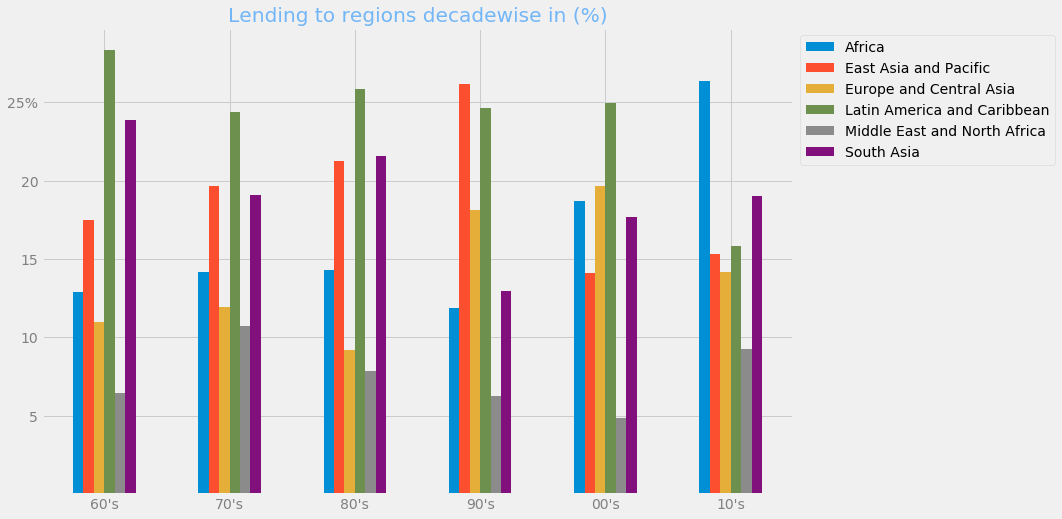

In [10]:
#Plotting the regionwise lending for each decade
fig,ax = plt.subplots(figsize=(12,8),clear=True)
region_decades.plot(kind='bar',ax=ax)
ax.set_xticklabels(labels=["60's","70's","80's","90's","00's","10's"],rotation='horizontal',color='grey')
ax.set_xlabel("")
ax.set_yticklabels(labels=["","5","10","15","20","25%","30%"],rotation='horizontal',color='grey');
ax.legend(loc='upper left',bbox_to_anchor=(1,1))
ax.set_title("Lending to regions decadewise in (%)",color='dodgerblue',alpha=0.6);
ax.grid("major")

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


ValueError: ignored

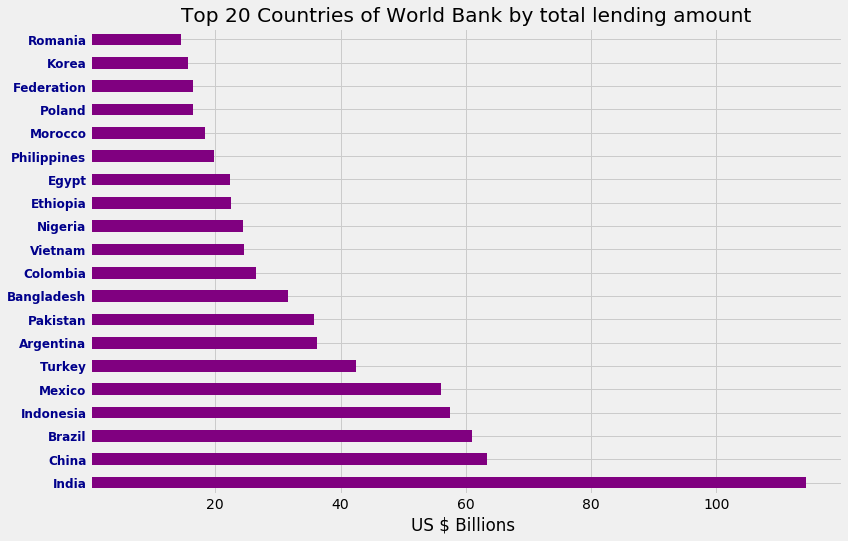

In [11]:
fig,ax = plt.subplots(figsize=(12,8),clear=True)
valid_data.groupby('countryname')['totalamt'].sum().sort_values(ascending=False)[:20].plot(kind='barh',ax=ax,color='purple')
ax.set_xticklabels(labels=["","20","40",'60','80','100'])
ax.set_yticklabels(labels=['India', 'China','Brazil', 'Indonesia','Mexico', 'Turkey', 'Argentina',
       'Pakistan', 'Bangladesh','Colombia', 'Vietnam','Nigeria','Ethiopia', 'Egypt','Philippines', 'Morocco',
       'Poland', 'Federation', 'Korea','Romania'],fontsize=12,color='darkblue',weight='bold')
ax.set_ylabel("")
ax.set_title("Top 20 Countries of World Bank by total lending amount")
ax.set_xlabel("US $ Billions ")
ax.grid("major")


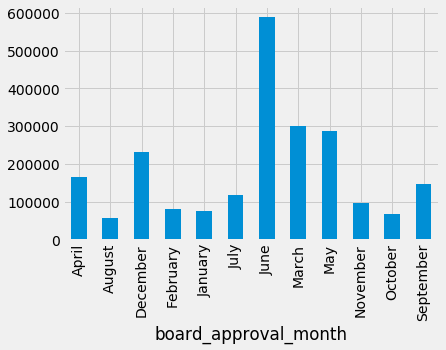

In [12]:
#Loan amount based on mounth of Approval
wb_data.groupby('board_approval_month')['lendprojectcost'].sum().plot(kind='bar');

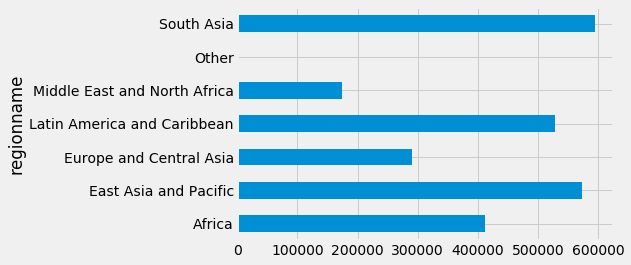

In [13]:
#Amount given by Region
wb_data.groupby('regionname')['lendprojectcost'].sum().plot(kind='barh');

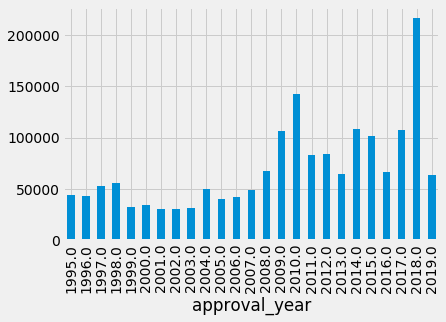

In [14]:
#Amount lending by year of approval
wb_data.groupby('approval_year')['lendprojectcost'].sum().tail(25).plot(kind='bar');

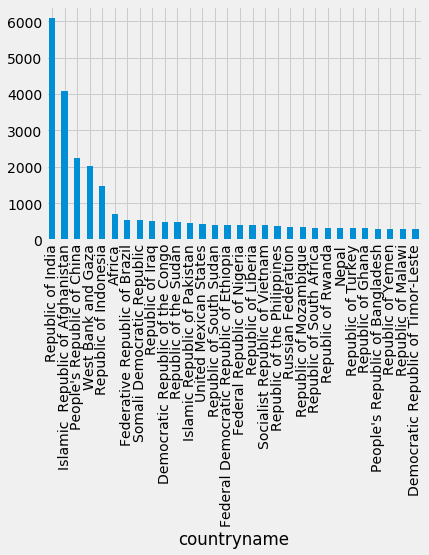

In [15]:
#Finding the major recepients of Grant Amount
wb_data.groupby('countryname')['grantamt'].sum().sort_values(ascending=False)[:30].plot(kind='bar');

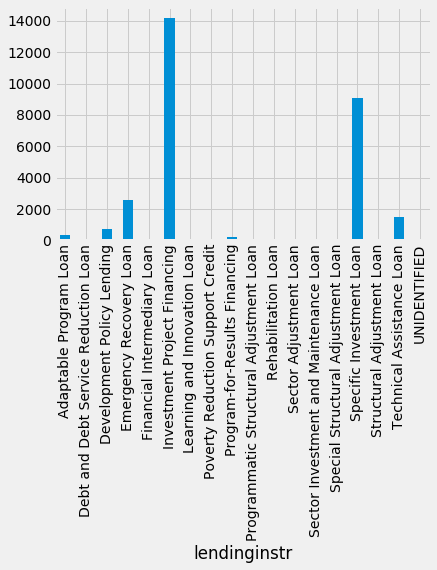

In [16]:
#Type of lending instrument for grant amount
wb_data.groupby('lendinginstr')['grantamt'].sum().plot(kind='bar');